# Probabilistic Models – Spring 2021
## First Course Exam, March 12.3.2021 9.00-11.30

<span style="color:red">**Carmen Diez 015380485**</span>

### Instructions
Make sure the notebook produces correct results when ran sequentially starting from the first cell. You can ensure this by clearing all outputs (`Edit > Clear All Outputs`), running all cells (`Run > Run All Cells`), and finally correcting any errors.

-Submit this notebook containing your derivations to Moodle.

-The return form will be closed at 11.30 (or a minute later), be sure to submit your answers in time.

-Any outside contact during the exam is strictly forbidden.

-Points are given only to answers that have all the calculations and justifications returned.

-Return any partial solutions, points are awarded for partial solution.

-Some questions may benefit from online search, you are permitted to use internet, books and sources -
but direct copy-paste from sources is not permitted, and ANY SOURCE YOU USE MUST BE CITED.
You can use code from your exercises (if it is needed, cited of course).

-You can use any language for the calculations, Python and R are preferred.

-The answers will be graded by a person.

Return format:

-Jupyter notebooks are the preferred format.

-Text format is also permitted.

-Pdf is also permitted.

-Clear photos of clearly hand written answers are also permitted.

## Question 1: motivation (6 points)
***

Why have researchers developed probabilistic graphical models? What problems do they solve and what are the key advantages? Full points can be obtained by three paragraphs, each a detailing clear, separate and non-overlapping advantage.


### Solution

First, symbolic logic is generally suboptimal for common sense reasoning: too much work to have into account all the factors and attend all the rules, we actually don't know all the factors in general and, because of monocity, logic doesn't let us change our minds. Thanks to probability we can address easilier these problems: we give a probability to a success, not all the factors related to it; and we can use Bayes' formula to adjust the probability if needed.

Furthermore, probabilistic graphical methods offered an scenario where many computations were less complex and easy to perform than usual. For example, the algortihms for Belief Propagation and jointrees are a proof for this. Bayesian networks are useful for computations as they define a unique probability distribution over the network variables, they consider some variables and only its direct parents at a time, and, thanks to that, if the number of parents remain small, we only have a polynomial number of probabilities. These properties makes them reliable and easy to handle.


Lastly, one of the main reasons to use probabilistic graphical models is that they have been used to help solving real-world problems. There are a lot of uses for them in biology (as the problem of the DNA and RNA we did), text classifiers (also as the problem from week 3), speech recognition, natural language processing...


*Answers derived mostly from the course slides.*

## Question 2: statistical independence (6 points)
***

Give a single concrete probability distribution over three binary random variables X, Y , Z, with properties:

(a) The distribution is positive, i.e., all value assignments have probability > 0.

(b) X is statistically dependent on Y.

(c) Z is statistically dependent on Y.

(d) X is statistically independent of Z.

Clearly justify that the properties are satisfied EXACTLY in a single distribution.

### Solution

$A$ and $B$ are independent if $P(A | B) = P(A)$ (if $P(B) > 0$). The condition can also be expressed as $P(A,B)=P(A)P(B)$.

For these properties to hold we want:

  (a) $P(X, Y) \neq P(X)P(Y)$, $P(X | Y) \neq P(X)$ nor $P(Y | X) \neq P(Y)$.
  
  (b) $P(Y, Z) \neq P(Y)P(Z)$, $P(Y | Z) \neq P(Y)$ nor $P(Z | Y) \neq P(Z)$.
  
  (c) $P(X, Z) = P(X)P(Z)$, $P(X | Z) = P(X)$ and $P(Z | X) = P(Z)$.
  
And $P( A |B) = \frac{P(A,B)}{P(B)}$. 

Thus, $P(X,Y,Z)= P(Y)P(X|Y)P(Z|X,Y)= P(Y)P(X|Y)P(Z|Y)$.

We can express these relations with a BN. With the DAG and CPT's the probability distribution is defined. For example the CPTs can be defined by:

P(Y=T) = 0.5

P(X=T|Y=T) = 0.3

P(X=T|Y=F) = 0.6

P(Z=T|Y=T) = 0.4

P(Z=T|Y=F) = 0.2

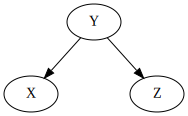

In [38]:
import graphviz

g = graphviz.Digraph(engine='dot', graph_attr={'rankdir':'TB', 'size':'20', 'nodesep':'1'})

g.node("X")
g.node("Y")
g.node("Z")

g.edge("Y", 'Z')
g.edge("Y", 'X')

g

Then, the distribution can be expressed with a joint distribution table and its unique:

In [44]:
#P(X,Y,Z)= P(Y)P(X|Y)P(Z|Y)
fff = (1-0.5)*(1-0.6)*(1-0.2)
fft = (1-0.5)*(1-0.6)*0.2
ftf = (1-0.5)*0.6*(1-0.2)
ftt = (1-0.5)*0.6*0.2

tff = 0.5*(1-0.3)*(1-0.4)
tft = 0.5*(1-0.3)*0.4
ttf = 0.5*0.3*(1-0.4)
ttt = 0.5*0.3*0.4

print('YXZ')
print('FFF: ',fff)
print('FFT: ',fft)
print('FTF: ',ftf)
print('FTT: ',ftt)

print('TFF: ',tff)
print('TFT: ',tft)
print('TTF: ',ttf)
print('TTT: ',ttt)

YXZ
FFF:  0.16000000000000003
FFT:  0.04000000000000001
FTF:  0.24
FTT:  0.06
TFF:  0.21
TFT:  0.13999999999999999
TTF:  0.09
TTT:  0.06


## Question 3: Bayesian networks (6 points)
***

Consider the following BN structure. 

![bn.svg](bn.svg)

Answer the following queries and questions.

(a) Decide whether the following d-separations hold or not. Justify your answer here in detail. Points only with a solid justification.


(a1) D d-separated from F given H, E?

(a2) A d-separated from H given B, G?

(a3) B d-separated from C given A, E?

(a4) D d-separated from  C?

(a5) D d-separated from A given H, G?


(b) Suppose two nodes X and Y are not adjacent in the DAG structure of a Bayesian network, i.e., there is no arc between them. Show that there is a set S, such that X and Y are d-separated given S. (Hint: You can examine the above network and then formulate a general proof.)

### Solution

(a1) $D \mathrel{\unicode{x2AEB}}_{G} F \mid H, E$: false, as there is an active path D → F.

(a2) $A\mathrel{\unicode{x2AEB}}_{G} H \mid B, G$: false, as there is an active path A → C → E → F → H.

(a3) $B\mathrel{\unicode{x2AEB}}_{G} C \mid A, E$: false, as there is an active path B → $E$ ← C.

(a4) $D\mathrel{\unicode{x2AEB}}_{G} C$: true, as all paths are blocked by  F → H ← G or  D → F ← E.

(a5) $D\mathrel{\unicode{x2AEB}}_{G} A \mid H, G$: true, all paths are blocked by A → B → E or  A → C → E.

(b) As shown in exercise 2.2, a node in a Bayesian network is conditionally independent of all the other nodes, given its (minimal) Markov blanket (parents, children, spouses (parents of children)). Then, for this scenario, the set S stated is the minimal Markov blanket and X can be the first node and Y the second one.

### Select and answer 2 of the following 3 questions. Clearly mark which ones you want to be graded.

I want **4** and **5** to be graded.

## Question 4: naive Bayes classifiers, parameter estimation (6 points, return answers to 2 of the questions 4, 5, and 6)
***

Suppose W1 and W2 are words that appear commonly in emails. Suppose you have the following dataset:

SPAM:

-200 emails with W1 and W2

-300 emails with W1 but not W2

-400 emails with W2 but not W1

-900 emails with neither W1 or W2

NOT SPAM:

-100 emails with W1 and W2

-500 emails with W1 but not W2

-400 emails with W2 but not W1

-800 emails with neither W1 or W2

(a) Formulate the Naive Bayes Classifier for classifying mail in to SPAM and not SPAM with words W1 and W2 as the features. Learn the parameters using Laplace smoothing.

(b) Using these parameters, what is the probability of the next email being spam, if both words W1 and W2 appear in it.

### Solution

Using the same logic as in exercise 3.1 and the formulas from lecture 5.

With Laplace Smoothing and assuming parameter sharing.

$P(C=c)= \frac{N_c +1}{N + |dom(C)|}$ and $P(X_j = a | C=c) = \frac{N_{c,a} +1}{\sum_{b=1}^{T} N_{c,b} + T}$.

In [20]:
import pandas as pd
import numpy as np

In [21]:
#a
NSpam = 200+300+400+900 #Nc c = spam
NNotSpam = 100+500+400+800 #Nc c = not spam
N = NSpam + NNotSpam #N
domC = 2
T = 2

columns = ['word','notSpam', 'spam']
df = pd.DataFrame(columns=columns)

df = df.append({'word': 'W1', 'notSpam': 100+500 , 'spam': 200+300}, ignore_index=True)
df = df.append({'word': 'W2', 'notSpam': 100+400 , 'spam': 200+400}, ignore_index=True)
df

,word,notSpam,spam
0,W1,600,500
1,W2,500,600


In [25]:
denomNotSpam = df['notSpam'].sum() + T
denomSpam = df['spam'].sum() + T

In [26]:
dfProbs = df.copy()
for i in df.index:
    dfProbs.at[i, 'notSpam'] = (df.at[i, 'notSpam'] + 1)/(denomNotSpam)
    dfProbs.at[i, 'spam'] = (df.at[i, 'spam'] + 1)/(denomSpam)
dfProbs = dfProbs.append({'word': 'P(C)', 'spam': (NSpam+1)/(N+domC), 'notSpam': (NNotSpam+1)/(N+domC)}, ignore_index=True)
dfProbs

,word,notSpam,spam
0,W1,0.545372,0.454628
1,W2,0.454628,0.545372
2,P(C),0.5,0.5


In [35]:
#b
def PWordCondClass(w, cl):
    return dfProbs[dfProbs['word'] == w][cl].item()
def PClass(cl):
    return dfProbs[dfProbs['word'] == 'P(C)'][cl].item()

def PClassCondData(cl, data):
    prob = 1
    for w in data:
        prob = prob*PWordCondClass(w, cl)
    return prob*PClass(cl)

def posteriorSpam(data):
    pSpamCondData = PClassCondData('spam', data)
    pNotSpamCondData = PClassCondData('notSpam', data)
    
    norm = 1/(pSpamCondData+pNotSpamCondData)
    print('P(C=Spam|D)=', pSpamCondData*norm)
    print('P(C=NotSpam|D)=', pNotSpamCondData*norm)

In [36]:
#P(C=NotSpam|D)
posteriorSpam(['W1', 'W2'])

P(C=Spam|D)= 0.5
P(C=NotSpam|D)= 0.5


## Question 5: inference, causality (6 points, return answers to 2 of the questions 4, 5, and 6)
***

Consider the following singly connected Bayesian network.

![inference.png](inference.png)

(a) Calculate the distribution P(W|X = 0) by factor elimination. You may use any version of the algorithm but you must calculate it yourself, and not use packages. Return all calculations.

(b) Calculate the distribution P (W |do(X = 0)). Return all calculations.

(c) Is there a difference in the result of (a) and (b) or not? Why?

### Solution

Elimination tree from which we can perform message passing (as in exercise 6.6):

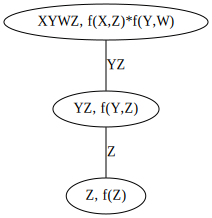

In [48]:
import graphviz

g = graphviz.Graph(engine='dot', 
                   graph_attr={'rankdir':'TB', 
                               'size':'7', 'nodesep':'2'})

g.node("XYWZ, f(X,Z)*f(Y,W)")
g.node("YZ, f(Y,Z)")
g.node("Z, f(Z)")

g.edge("XYWZ, f(X,Z)*f(Y,W)", "YZ, f(Y,Z)", label="YZ")
g.edge("YZ, f(Y,Z)", "Z, f(Z)", label="Z")

g

In [49]:
def multPass(f1, f2):   
    nodes = np.unique(list(f1.columns[:-1]) + list(f2.columns[:-1])).tolist()
    col1 = f1.columns[-1]
    col2 = f2.columns[-1]
    
    fres = f1.merge(f2, how='left')
    fres[col1] = fres[col1]*fres[col2]
    fres = fres.drop(columns = col2)
    
    return fres[nodes+[col1]]

def sumOutPass(f1, V): #take V out
    if len(V)==0:
        return f1
    cols = f1.columns[:-1]
    colsOut = list(cols[[node not in V for node in cols]])
    fres = f1.groupby(colsOut, as_index=False).sum().drop(columns = V)
    return fres 

def projPass(f1, V): #stay with V only
    V = list(set(f1.columns[:-1]).difference(set(V)))
    return sumOutPass(f1, V)

$phi1 = f(X,Z)*f(Y,W)$

## Question 6: structure learning (6 points, return answers to 2 of the question 4, 5, and 6)
***

Consider the following local scores (not likelihood equivalent, i.e., members of the same Markov equivalence class may receive different scores). 

f(1, {}) = 70, f(1, {2}) = 65, f(1, {3}) = 70, f(1, {2, 3}) = 2

f(2, {}) = 15, f(2, {1}) = 61, f(2, {3}) = 46, f(2, {1, 3}) = 86

f(3, {}) = 30, f(3, {1}) = 8, f(3, {2}) = 78, f(3, {1, 2}) = 50

Use the dynamic programming algorithm to find (one of) the highest scoring DAG(s). Do not use ready made packages. Return all calculations.

In [ ]:
# Provide you answer in cels here